# Digital Signal Processing - 6

### Signals and Filters

In the process of passing the signal from the source to the receiver, the data sequence undergoes changes and transformations. These transformations are due to the passage of the signal through various computing devices that implement a particular mathematical problem. In the tasks of digital signal processing, data passes through digital circuits, which are called *filters*. Digital filters, like analog ones, have different characteristics. As a rule, these characteristics are expressed in the frequency representation - the amplitude-frequency and phase-frequency characteristics of the filter. Digital filters are mainly used to improve signal quality - to isolate a signal from a data sequence, or to degrade unwanted signals - to suppress certain signals in incoming sequences of samples.

Today, digital filters are used almost everywhere where signal processing is required. Even primitive mathematical operations (multiplication and addition) can be represented as a digital filter. Therefore, all the devices that surround us (computers, telephones, televisions, etc.) contain a number of digital filters. For example, TVs use filters to convert the output image. Adjusting the brightness - in fact, filtering the image.
Thus, digital filters are used in a wide range of signal processing tasks: spectral analysis, audio and video data processing, speech, motion processing, etc. As applied to DSP tasks, a filter is a certain mathematical system that changes the shape of the input signal (amplitude, phase, frequency).

**Benefits of digital filters**:

- The ability to obtain characteristics that cannot be obtained by analog methods (for example, accurate linear phase response).
- Digital filters are more stable to external changes in the environment (temperature, humidity, pressure). Therefore, digital filters do not require constant calibration.
- Ease of tuning the frequency of signal processing.
- Depending on the processing speed and frequency of the signal, one filter can simultaneously process data from several channels.
- The data before and after the filter can be saved on any medium. It is more difficult to record analog signals (in any case, digitization and vice versa is required).
- Low power consumption and low cost relative to analog filters.
- Increased accuracy of calculation (modern digital devices are not limited in accuracy of calculation).
- Ease of designing filters with complex frequency characteristics.
- In biomedical applications, the use of analog filters at very low frequencies is difficult, unlike digital filters.

**Disadvantages of digital filters**

- **Limited bit depth**. During the calculation, quantization noise and rounding noise are accumulated in digital filters with finite bit depth. One of the typical tasks of DSP is the choice of a suitable filter bit.
- **Limit processing speed**. As a rule, analog filters are capable of processing data at very high frequencies. Digital filters are limited by the sampling rate.
- **Hardware**. Since real signals in nature are continuous, ADC and DAC are used to process them. The quality of the received digital (analog) signals also depends on the characteristics of these devices.

Signals and filters depending on the presentation method are characterized by different functions:

| **Signal** | **Filter** |
| --- | --- |
| samples $ x(n) $ | impulse response $ h(n) $ |
| z-form $ X(z) $ | transfer function $ H(z) $ |
| spectral density $ X (e^{j \phi}) $ | frequency response $ H (e^{j \phi}) $ |
| spectrum modulus $ \ | X (e^{j \phi}) \ | $ | Frequency Response $ \ | H (e^{j \phi}) \ | $ |
| spectrum argument $ arg (X (e^{j \phi})) $ | Phase response $ arg (H (e^{j \phi})) $ |

**The impulse response** $ h(n) $ is the reaction of the circuit to the input action in the form of the Dirac function (δ-function). It reflects the effect of the circuit on the signal. In digital devices, the impulse response can be finite or infinite. Therefore, there are two classes of digital filters - with finite impulse response and with infinite impulse response.

Digital filters are described by the difference equation:
$ y(k) = \frac{1}{a_0}\cdot(\sum_{k=0}^{N}b_{k}x(n-k) - \sum_{k=0}^{M}a_{k}y(n-k))$  

In this formula, $ y(k) $ is the output action or samples at the output of the digital filter. $ x(k) $ is the input signal. $ a_{k} $ and $ b_{k} $ are the factors (coefficients) of the digital links at the input and output. These factors are also called the numerator and denominator coefficients of the filter transfer characteristic.

The transfer characteristic of the filter is as follows:

$ H(z) = \frac{B(z)}{A(z)} = \frac{b_0 + b_{1}z^{-1} + ... + b_{N}z^{-N}}{1 + a_{1}z^{-1} + ... + a_{M}z^{-M}}$  

where $ N $ and $ M $ are the number of delay lines for the input and output signals. In general, this is an IIR filter formula. If the denominator is equal to unity, then the formula corresponds to the expression for the FIR filter (digital filter without feedback).

According to the implementation of the digital filter, two methods are distinguished: hardware and software. Hardware filters are implemented on FPGAs or specialized signal processors. Software filters are implemented using programs executed by a processor or microcontroller.

Filters can be recursive when the output sample depends on the previous output and on the input, i.e. feedback is present in the circuit, or non-recursive, when the output sample depends only on the input samples.

### IIR and FIR filters

**FIR filter** (FIR - “finite impulse response”) is a digital filter with a finite impulse response. The impulse response of such a filter is limited in time, that is, it has a countable number of coefficients. Starting from a certain point in time, it becomes equal to zero. If a single pulse is applied to the input of the FIR filter, there will be a finite number of samples at the output of the filter. As a rule, the phase response of a filter with a finite impulse response is linear

In the general case, FIR filters are implemented without feedback, i.e. they are non-recursive. However, using mathematical transformations, you can bring the filter to a recursive form.

FIR filter difference equation:
$ y(n) = \sum_{k=0}^{N-1}h(k)x(n-k) $
Where

- $ y (n) $ - discrete output signal (sum of weighted input pulses),
- $ x (n) $ - input discrete signal (sequence of samples),
- $ h (n) $ are the coefficients of the impulse response of the filter,
- $ N $ - length (order) of the filter.

Transfer characteristic of the FIR filter:

$ H(z) = \sum_{k=0}^{N-1}h(k)z^{-k} $

Recall that the operation $ z^{- k} $ is a delay of a sequence on k-samples.

**IIR filter** (English IIR - “infinite impulse response”) is a digital filter with an impulse response that is infinite in time, that is, it has a very large or infinite number of coefficients. IIR filters are also called recursive due to the fact that feedback is used during their implementation (the signal from the filter output through the delay elements goes to the filter and makes changes to itself). The transfer function of the IIR filter is fractionally rational. The main known IIR filters: Chebyshev, Butterworth, Kalman, Bessel, etc.

IIR filter difference equation:
$ y(n) = \sum_{k=0}^{N}b_{k}x(n-k) - \sum_{k=0}^{M}a_{k}y(n-k)$

or

$ y(n) = b_{0}x(n) + b_{1}x(n-1) + b_{M}x(n-M) + ... - a_{1}y(n-1) - a_{2}y(n-2) - ... - a_{N}y(n-N)$

As you can see, the output signal due to feedback affects itself.

IIR filter response:
$ H(z) = \frac{B(z)}{A(z)} = \frac{b_0 + b_{1}z^{-1} + ... + b_{N}z^{-N}}{1 + a_{1}z^{-1} + ... + a_{M}z^{-M}}$ 

Unlike FIR filters, IIR filters are not always stable. For the stability of the digital IIR filter, it is required that all poles of the transfer characteristic in absolute value be strictly less than unity (that is, lie inside the unit circle on the z-plane).

**Filter order** - maximum degree in the expression of the transfer function $ H(z) $.

The transfer function can be implemented using various structural schemes. The most common are serial and parallel block diagrams. If the transfer fractional rational function of the recursive filter is represented as the product of the transfer functions of the first and second order, then the structural scheme will be *sequential*. If the transfer function of a recursive filter is represented as the sum of the transfer functions of the first and second order, then the structural scheme will be *parallel*.



## Canonical and direct scheme

The block diagram of a digital filter can be represented in direct and canonical form. Digital filters can be implemented using three digital elements: a multiplier, an adder and a delay unit. Obviously, multipliers are required to multiply the samples by the coefficients $ a_{k} $ and $ a_{k} $, and the adder combines the results.

Block diagram of a non-recursive FIR filter, according to the equation:

<div>
<img src="Images/fir_scheme.svg" alt = "FIR Common scheme" width="70%">
</div>
    The number of delay lines is always one less than the number of coefficients or the order of the filter. The impulse response of the FIR filter coincides with the set of coefficients of this filter.

The block diagram of the IIR filter looks a bit more complicated due to the presence of feedbacks:

<div>
<img src="Images/iir_scheme.svg" alt = "IIR Common scheme" width="70%">
</div>


The number of IIR filter delay lines is $ N + M $.

The canonical **block diagram** minimizes the number of delay lines because it uses common delay lines. Input adder - with feedbacks. Output adder - summarizes the result. Converting from one form to another is quite simple and trivial.

<div>
<img src="Images/iir_scheme2.svg" alt = "IIR scheme 2" width="70%">
</div>

### Filter selection

Developers of digital devices often face the challenge of choosing a filter type. The choice between FIR and IIR filters is made according to the following criteria:

- The phase response of the IIR filter is non-linear. FIR filters can have a strictly linear phase response. This means that such a filter does not distort the waveform.
- FIR filters are stable because implemented in a non-recursive form. IIR filters may be unstable.
- In real problems, the question is about choosing the bit depth of data (rounding, quantization). These processes make a smaller contribution to devices without feedback, that is, to FIR filters.
- The implementation of a frequency response of a complex shape or a maximum rectangular shape will require a significant number of FIR filter coefficients. IIR filters do this better.
- FIR filters, as a rule, do not have equivalent analog filters.
- FIR filters allow you to easily obtain the required characteristics (level of attenuation, unevenness in the passband, cutoff frequency, etc.)
- IIR filters are significantly more economical in terms of the number of operations of multiplication, addition and the number of delay lines.

### Example

Let there be a filter, which is described by the following transfer function:

$ H(z) = \frac {b_0 + b_{1} z^{- 1} + b_{2} z^{- 2}} {1 + a_{1} z^{- 1} + a_{2 } z^{- 2}} $,

Where

- $ N = 2, M = 2 $
- $ b_{i} = \{0.1, -0.6, 0.5 \} $
- $ a_{i} = \{1, 0.7, -0.2 \} $

The number of difference equations for a particular filter is equal to the number of adders in the circuit. Knowing the difference equation, one can find the impulse response of the filter: a single impulse is applied to the input (the initial conditions are zero)

Find the impulse response using Python. Using the `lfilter (b, a, x)` function, the process of passing the `x` signal through a digital filter is simulated, with the transfer characteristic coefficients` a` and `b`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

%matplotlib inline

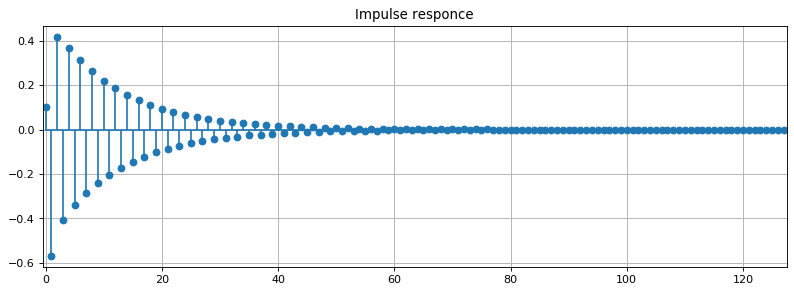

In [2]:
N = 128
# Delta-function
x = np.ones(N)
x[0] = 1

# Input signal:
# h(z) = [b0 + b1*z^(-1) + b2*z^(-2)] / a0 + a1*z^(-1) + a2*z^(-2)
b = [0.1, -0.6, 0.5]
a = [1, 0.7, -0.2]

y1 = lfilter(b, a, x)

plt.figure(figsize=(12, 4), dpi=80)
plt.title('Impulse responce')
plt.stem(y1, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

**If the filter is stable, then the y(n) samples decrease in magnitude with time**.

As you can see in the previous graph, the calculated IIR filter is stable.

### IIR filters (SCIPY / MATLAB)


Below is a list of the main functions of IIR filters for implementation in python using the signal package - `scipy.signal`. Most functions have similar MATLAB prototypes.

| **Function** | **Description** |
| --- | --- |
| `iirdesign (wp, ws, gpass, gstop [, analog, ...])` | Function for the complete calculation of the digital filter. Returns the coefficients `a, b`, zeros and poles, etc. |
| `iirfilter (N, Wn [, rp, rs, btype, analog, ...])` | Implementation of the IIR filter of the selected type and N-order. Returns the coefficients `a, b`, zeros and poles, etc. |
| `butter (N, Wn [, btype, analog, output, fs])` | Butterworth filter. Implements an N-order filter and returns filter coefficients. |
| `buttord (wp, ws, gpass, gstop [, analog, fs])` | Returns the minimum order required to implement a filter |
| `cheby1 (N, rp, Wn [, btype, analog, output, fs])` | Chebyshev type 1 filter. Implements an N-order filter and returns filter coefficients. |
| `cheb1ord (wp, ws, gpass, gstop [, analog, fs])` | Returns the minimum order required to implement a filter |
| `cheby2 (N, rs, Wn [, btype, analog, output, fs])` | Chebyshev filter type 2. Implements an N-order filter and returns filter coefficients. |
| `cheb2ord (wp, ws, gpass, gstop [, analog, fs])` | Returns the minimum order required to implement a filter |
| `ellip (N, rp, rs, Wn [, btype, analog, output, fs])` | Elliptical IIR Filter (Cauer) |
| `ellipord (wp, ws, gpass, gstop [, analog, fs])` | Returns the minimum order required to implement a filter on input argument values ​​|
| `bessel (N, Wn [, btype, analog, output, norm, fs])` | Bessel IIR filter. |
| `iirnotch (w0, Q [, fs])` | ** Barrier ** filter. Returns the coefficients `a, b`. Input arguments - signal frequency, quality factor and cutoff frequency |
| `iirpeak (w0, Q [, fs])` | **Bandpass** filter. The function returns the second-order filter coefficients `a, b`. Input arguments - signal frequency, quality factor and cutoff frequency |

### Butterworth Filter

Implementation example **Butterworth filter** 3 orders. We show how a noisy signal passes through such a filter:

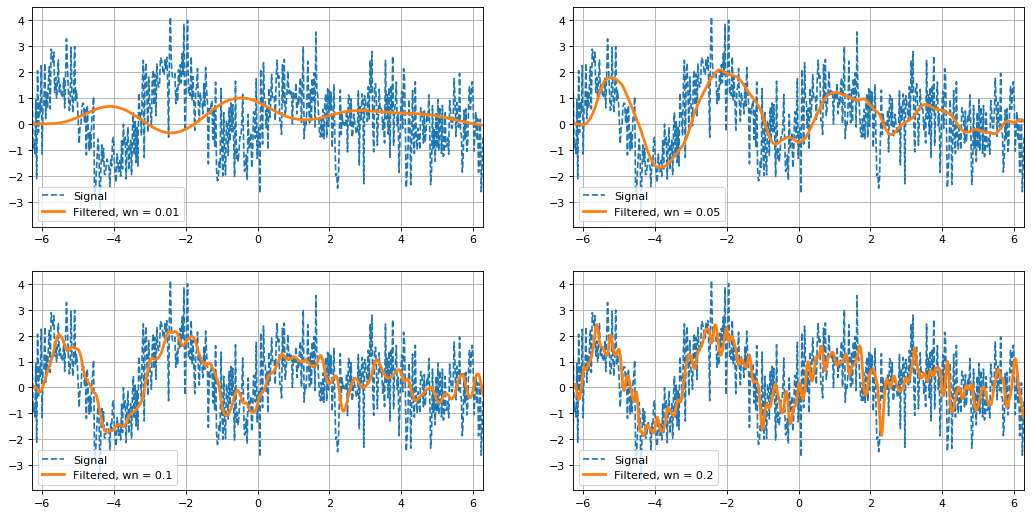

In [3]:
# Create input signal
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Add some white noise
np.random.seed(1)
xn = x + np.random.randn(len(t))

# 3-order lowpass butterworth filter
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

wn = [0.01, 0.05, 0.1, 0.2]

# Calculate IIR filter
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)

# Plot results
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower left')

### Recursive FIR filters

As mentioned earlier, FIR filters are mainly constructed in a non-recursive form, but there are ways to bring the filters to a recursive form.

Consider the following example. We write the transfer characteristic of the filter:

$ H(z) = 1 + z^{-1} + z^{-2} + z^{-3} $,  

Multiply the transfer function by

$ \frac{1 - z^{-1}}{(1 - z^{-1}} $. 

We skip the mathematical calculations (if desired, this can be done independently due to the triviality of the problem under consideration) and write the result:

$ H(z) = \frac{1 + z^-3}{1 - z^-1} $

The block diagram of such a filter is shown in the following figure. It consists of two circuits: a link without feedback is a differentiating link, and a link with feedback is an integrating link (adder with feedback).

<div>
<img src="Images/fir_recursive.svg" alt = "FIR Recursive" width="70%">
</div>

We show that the signal passing through the recursive FIR filter has similar characteristics.

In [4]:
N = 25
# Delta-function
x = np.zeros(N)
x[0] = 1

# Filter order - M
M = 16
# Input signal
# h(z) = 1 + z^(-1) + ... + z^(-9)
b = np.ones(M-1)
a = [1]

y1 = lfilter(b, a, x)

# Change to recursive form
b = np.zeros(M)
b[0] = 1
b[M-1] = -1

a = [1, -1]
y2 = lfilter(b, a, x)

# Check the difference
np.all(y1 == y2)

True

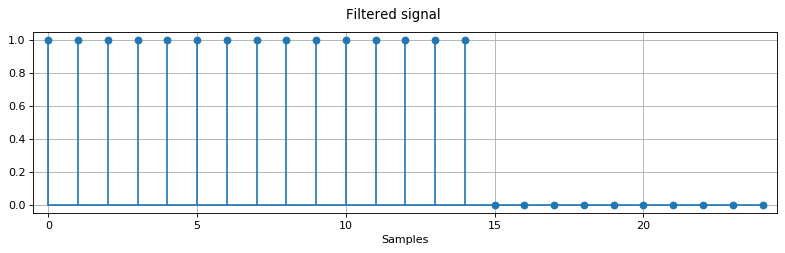

In [5]:
plt.figure(figsize=(12, 3), dpi=80)
plt.stem(y2, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.xlabel('Samples')
plt.suptitle('Filtered signal')
plt.grid(True)

As can be seen from the graph, the impulse response of the recursive filter is equal to the unit vector. Moreover, the length of the vector is equal to the length of the filter.

### Homogeneous FIR filters

Such FIR filters are called **homogeneous**. The implementation of these filters does not require the operation of multiplication, therefore, the filter works quite quickly and is pretty well implemented on the FPGA.

The disadvantage of such filters is the high level of side lobes. The side lobes of the frequency response are suppressed by cascading the filters, while the position of the zeros does not change, only the ratio of the levels of the main and side lobes changes, the relative level of the side lobes decreases when the frequency response is multiplied.

The second disadvantage of homogeneous filters is **non-rectangular** form of frequency response. To make it more rectangular, use the FIR filter, so that the shape of the main lobe becomes more rectangular, but the level of the side lobes increases.

In the section related to **decimation and interpolation** of signals, we consider these filters in more detail.

Using the `freqz` function, you can find the frequency response of the filter.

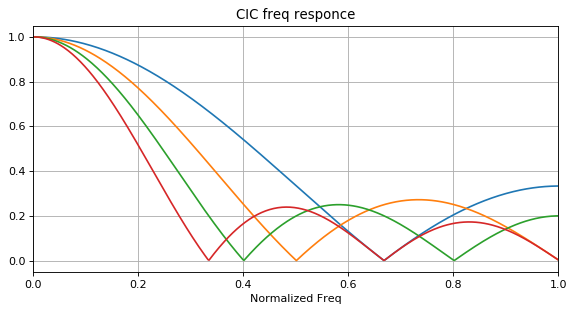

In [6]:
N = 512
f = np.linspace(0, 1, N, endpoint=True)
b = [1, 1, 1]

plt.figure(figsize=(14, 4), dpi=80)
plt.subplot(1, 2, 1)
for i in range(4):
    _, h = freqz(b, N)
    h = np.abs(h)
    plt.plot(f, h/np.max(h))
    plt.xlim([0, 1])
    plt.grid(True)
    b.append(1)
plt.xlabel('Normalized Freq')
plt.title('CIC freq responce')
plt.tight_layout()

### FIR filters with linear phase response

The most important feature of FIR filters is the ability to obtain an accurate **linear phase response**.

Why is it important? A signal passing through a filter undergoes various transformations. In particular, the amplitude and phase of the signal change depending on the frequency response of the filter (amplitude, frequency response and phase, phase response). For multi-frequency signals, it is unacceptable that when passing through the digital processing nodes, the phase of the signal is distorted. Moreover, if the frequency response in the passband is almost constant, it is not difficult, then there are problems with the frequency response.

To assess phase distortions, it is convenient to introduce the concepts of phase and group delays.

**Phase delay** is the delay value for each of the frequency components of the signal. Defined as phase angle divided by frequency.

$ \tau_{\phi} = - \theta(\omega)/\omega $

**Group delay** is the average time delay of the entire multi-frequency signal. Defined as the derivative of the phase in frequency.

$ \tau_{g} = - d\theta(\omega)/\omega $

From the group delay formula, the condition **of the linear phase response** of the filter is obvious. Rule:

**If the phase response is linear, then the group delay after taking the derivative is constant**

In other words, the group delay is constant for **all** frequency components. Thus, the linearity of the phase characteristic is one of the most important features of FIR filters.

### Impulse response symmetry

To ensure the linearity of the phase response, it is necessary to fulfill the condition **of symmetry of the impulse response** (or coefficients) of the filter. Simply put, an FIR filter with a linear phase response is symmetrical. There are 4 types of filters, differing by the parity of the filter order N and the type of symmetry:

- positive symmetry, even order,
- negative symmetry, even order,
- positive symmetry, odd order,
- negative symmetry, odd order.

For example, for filters with negative symmetry, a phase shift of $ \frac {\pi} {2} $ can be obtained. Such filters are used to design differentiators and **Hilbert transform**.

The envelope of the impulse response of the FIR filter is constructed according to the law **~ sin (x) / x** regardless of the type of filter (low frequencies, high frequencies, differentiator, band-pass or notch filter). To solve practical problems, you don’t have to think about what type of filter is selected.

### Design FIR filters

Under the "calculation of the FIR filter" in most cases they mean the search for its ** coefficients ** by the values ​​of the frequency response.

When creating a new digital FIR filter, an engineer goes through certain stages of development:

- **Filter Specification**. The type of filter (low-pass filter, high-pass filter, pass-band, notch), the number of coefficients **N**, the required frequency response, with tolerances for non-linearity in the attenuation band and pass band, etc.
- **Calculation of coefficients**. By any available methods and means, filter coefficients that satisfy the specifications of the previous paragraph are calculated.
- **Analysis of the consequences of finite bit depth**. At this stage, the effect of quantization effects on filter coefficients, intermediate and output data is estimated.

- **Implementation**. At this stage, the filter is developed by hardware or software: in an accessible programming language or based on FPGAs or special signal processors.

The development steps may be slightly different, but the essence of designing a digital FIR filter always remains the same.

### Filter Specification

At this stage, the engineer searches for compromise solutions to implement the required FIR filter with the desired parameters. They are few, but often you have to sacrifice one parameter to achieve the required values for other values.

- $ A_{pass} $ - unevenness in the passband,
- $ A_{stop} $ - level of attenuation in the suppression band,
- $ F_{pass} $ - cutoff frequency bandwidth,
- $ F_{stop} $ is the cutoff frequency of the attenuation band,
- $ N $ - filter order (number of filter coefficients).

In practice, the parameters $ A_{pass} $ and $ A_{stop} $ are given in decibels (dB), and the distance between $ F_{pass} $ and $ F_{stop} $ expresses the filter transition bandwidth. It is logical that the value of $ A_{pass} $ should be as low as possible, $ A_{stop} $ as large as possible, and the ratio $ F_{pass} / F_{stop} $ ideally tends to unity (perfectly rectangular frequency response).

The number of coefficients is not in vain entered into the filter specification. As will be shown below, the filter frequency parameters depend on the order of the filter N and the bit depth of the coefficients.

### Calculation of filter coefficients

There are many methods for calculating filter coefficients — the weighting method by window functions, the frequency sampling method, various optimal (according to Chebyshev) methods using the Remez algorithm, etc. All methods are unique in their characteristics and give certain results. For the window weighing method, the **Gibbs effect** becomes a negative manifestation, introducing unevenness and outliers into the frequency response of the filter between the calculated points of the function. You can deal with it endlessly and to no avail, but in practice, tolerances for unevenness in the passband and suppression band are introduced.

The main method for calculating the coefficients for many filters is the modified **Remez algorithm** - the Parks-McClellan algorithm. This is an indirect iterative method for finding optimal values ​​with the Chebyshev filter characteristic. The peculiarity of the method is to minimize errors in the attenuation band and pass band by the Chebyshev approximation of the impulse response.

It is quite logical that the greater the number of coefficients, the less the frequency response unevenness and the more rectangular it is. The final result depends on the choice of the method, but they all come down to the same goals - to minimize emissions in the passband and increase the "squareness" of the frequency response (while maintaining the linearity of the phase response).

### Analysis of consequences of finite capacity

**Bit depth of coefficients** - the main factor on which the type of frequency response depends. On the example of modern programmable logic integrated circuits (SLIs), the bit capacity of the coefficients can be selected any, but real values ​​range from 16 to 27 bits due to the peculiarity of the implementation of computing units (DSP48).

For high filter orders, it is often necessary to provide a large dynamic range of the discharge grid, but if this cannot be done, sooner or later, quantization errors begin to appear. Due to the limited bit depth of the coefficients, the frequency response is modified, and in some cases it is distorted so much that you have to sacrifice the parameters from the frequency specification to achieve an acceptable result. One way or another, the bit depth of the representation of the coefficients directly affects the maximum possible attenuation of $ A_{stop} $. Therefore, when using a too limited discharge grid of coefficients, it is sometimes impossible to achieve the desired suppression even with huge filter orders!

### Implementation

Using modern libraries in different programming languages (C ++, Python, MATLAB, etc.), the software implementation of FIR filters is not difficult. However, hardware implementation on microcontrollers or FPGAs is a complex and non-trivial task.

To implement the simplest FIR filters, operations of delay, multiplication by coefficients and addition of the product results are required. The main node with which the FIR FPGA filter is implemented is an integer DSP block. In this block, all mathematical operations occur - multiplication of input samples with filter coefficients, delay of the input signal, summation of data. Modern DSP nodes contain a preliminary adder, so even summation operations for filters with symmetric THEM can be done inside this node. In addition to the DSP block, the filter needs memory to store the coefficients and implement the delay link. As a rule, FPGAs have more than enough of these resources.

## Calculation of FIR filters in Python

**Software implementation of FIR filter - search for impulse response coefficients**.

FIR filters are calculated using some functions from the `scipy.signal` package. We list all the methods for designing FIR filters and consider each of them in detail.

| **Function** | ** Description ** |
| --- | --- |
| `firls (numtaps, bands, desired [, weight, nyq, fs])` | FIR Filter Calculation Using the Least Squares Method |
| `firwin (numtaps, cutoff [, width, window, ...])` | Implementation of an N-order FIR filter using a window function. Sets the cutoff frequency. |
| `firwin2 (numtaps, freq, gain [, nfreqs, ...])` | Calculation of the filter using the window function. A set of normalized frequencies and amplitudes at these frequencies is specified |
| `remez (numtaps, bands, desired [, weight, Hz, ...])` | Calculation of the optimal filter using the Remez algorithm |
| `group_delay (system [, w, whole, fs])` | Auxiliary function for calculating group delay. Input parameters - array of coefficients `a, b` |
| `get_window (window, Nx, fftbins = True) [source]` | Returns the coefficients of the window function of the required length |

#### Calculation of the FIR filter using the least squares method

Using the least squares method, this function calculates the coefficients of the filter, which has the best approximation to the desired frequency response. Mathematically, in the process of searching for coefficients, the integral of the weighted mean square error within the passband is minimized.

The `firls` method returns FIR filter coefficients. Function input arguments:

 - `numtaps` - filter order,
 - `bands` - a monotonous non-decreasing sequence of frequencies. All elements must be non-negative and less than or equal to the Nyquist frequency specified by the parameter `nyq`.
 - `desired` - a sequence of amplitudes containing the desired gain and attenuation at the given frequencies from` bands`.
 - `weight` - the relative" weight "of the passband and suppression. A compromise of quality in these bands.
 - `nyq` or` fs` is the Nyquist frequency. If not specified, the default is one.
 
 #### Calculation of the FIR filter using the Remez algorithm:

The `remez` method returns FIR filter coefficients. The input arguments are identical to the previous method:

 - `numtaps` - filter order,
 - `bands` - a monotonous non-decreasing sequence of frequencies. All elements must be non-negative and less than or equal to the Nyquist frequency specified by the parameter `nyq`.
 - `desired` - a sequence of amplitudes containing the desired gain and attenuation at the given frequencies from` bands`.
 - `weight` - the relative" weight "of the passband and suppression. A compromise of quality in these bands.
 - `Hz` or` fs` is the Nyquist frequency. If not specified, the default is one.
 
 #### Calculation of the FIR filter by the window method:

The firwin and firwin2 methods return FIR filter coefficients.

**firwin method**

 - `numtaps` - filter order,
 - `cutoff` - cutoff frequency relative to the sampling frequency` fs`.
 - `width` - if set, then shows the width of the transition from the passband to the suppression band.
 - `window` - window function. It is used in conjunction with the get_window method or the window name is directly set.
 - `fs` - sample rate or Nyquist frequency. If not specified, the default is one.

**firwin2 method**

 - `numtaps` - filter order,
 - `freq` is a monotonous non-decreasing sequence of frequencies. All elements must be non-negative and less than or equal to the Nyquist frequency specified by the `fs` parameter.
 - `gain` - a sequence of amplitudes containing the desired gain and attenuation at given frequency values ​​from` freq`.
 - `window` - window function. It is used in conjunction with the get_window method or the window name is directly set.
 - `fs` - sample rate or Nyquist frequency. If not specified, the default is one.
 
 #### Window function

A separate section is devoted to window functions and their features, however, we list the most used window functions in practical problems: Kaiser, Gauss, Blackman-Harris, flat-top window, Hamming, Hann, etc.

The `get_window` method is used to select a window function. Input arguments - window name and impulse response length.

The function returns a one-dimensional array of coefficients - impulse response values. These coefficients are “superimposed” by the convolution operation on the impulse response of the FIR filter.

#### Group Delay

This is an auxiliary function for calculating the group delay of digital filters. Input parameters - an array of coefficients `a, b`. The method returns a set of frequencies and the corresponding array of group delays at these frequencies.
____

### Examples

The first example is using the `firwin2` function. We set the array of normalized frequencies from 0 to 1. We set the gain at the selected frequencies, as well as the order of the filter. We construct the impulse response.

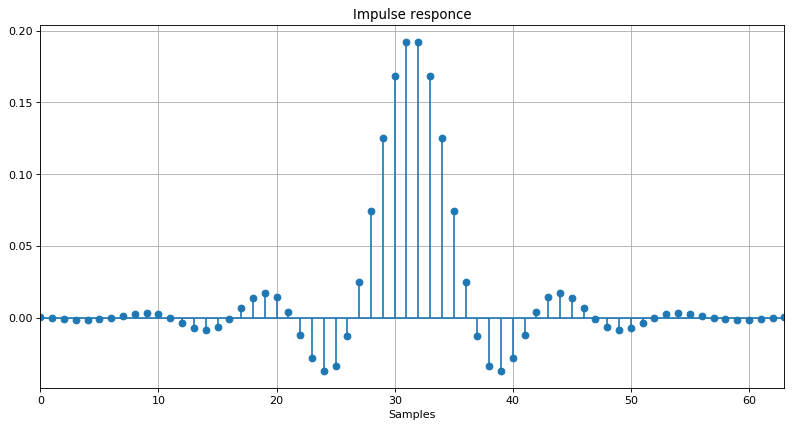

In [7]:
N = 100
# List of freqs
lst_freqs = np.linspace(0, 1, N)

# List of gains
lst_gain = np.zeros(N)
lst_gain[0:20] = 1

# FIR filter taps
NFIR = 64
taps = firwin2(NFIR, lst_freqs, lst_gain)

plt.figure(figsize=(12, 6), dpi=80)
plt.title('Impulse responce')
plt.stem(taps, use_line_collection=True, basefmt='C0')
plt.xlim([0, NFIR-1])
plt.xlabel('Samples')
plt.grid(True)

We construct the frequency response of the bandpass filter and the lowpass filter using three methods: `firls (), remez (), firwin2 ()`.

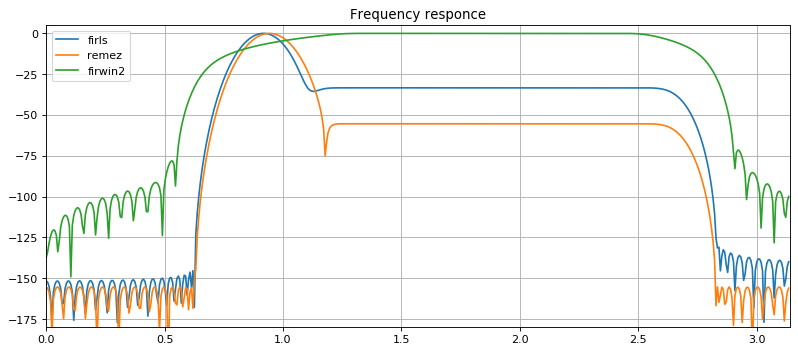

In [8]:
# Input parameters
fs = 10
N = 117
desired = (0, 0, 1, 1, 0, 0)
bands = (0, 1, 2, 4, 4.5, 5)

# FIR filters
fir_firls = firls(N, bands, desired, fs=fs)
fir_remez = remez(N, bands, desired[::2], fs=fs)
fir_firwin2 = firwin2(N, bands, desired, fs=fs)

# PLot results and calculate FFTs
plt.figure(figsize=(12, 5), dpi=80)
plt.title('Frequency responce')
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')
plt.grid(True)

### FIR Kaiser filter

We show the passage of a noisy harmonic signal through an FIR filter. We also add to this signal several high-frequency harmonic signals of different amplitudes.

As you can see, the noisy signal in the time domain is not amenable to any analysis. Passing such a signal through an FIR filter with a pre-selected cutoff frequency, you can select the signal of interest from the noise.

It should be noted that all signals and noises that fall into the filter passband remain and **contribute** to the quality characteristics of the resulting signal.

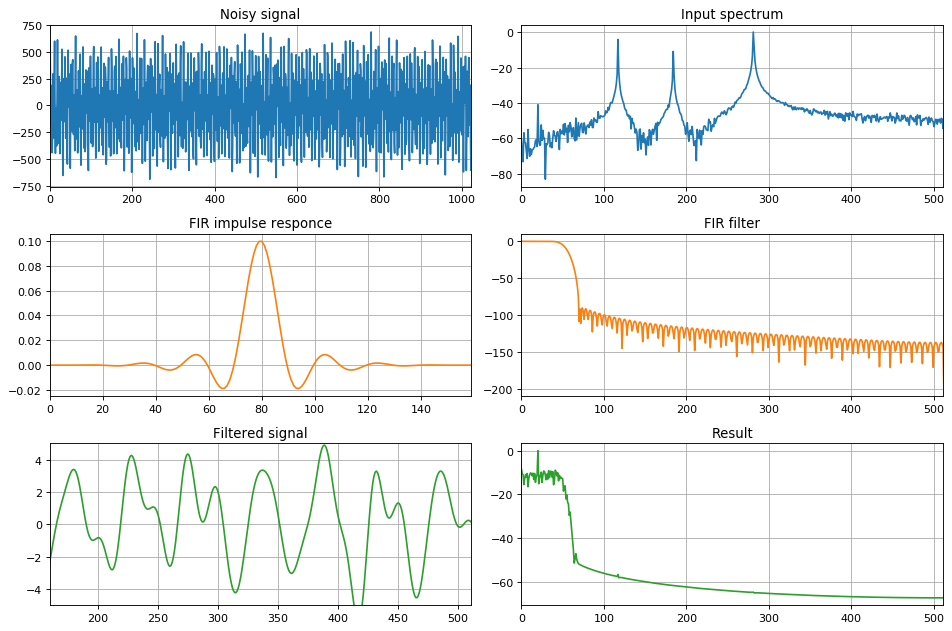

In [9]:
N = 1024
# Create input signal
t = np.linspace(0, 1, N, endpoint=True)
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Add some white noise
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Kaiser FIR filter
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))
y = lfilter(h, 1, xn)

# List of input signals
lst_sig = [xn, h, y]

sig_titles = ['Noisy signal', 'FIR impulse responce', 'Filtered signal']
fft_titles = ['Input spectrum', 'FIR filter', 'Result']


plt.figure(figsize=(12, 8), dpi=80)
for i in range(3):
    # Calculate FFTs
    clc_fft = np.abs(fft(lst_sig[i], N)) 
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))
    
    # Plot signals
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)
    
    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

The figure above shows that the output filtered signal with slight distortion is similar to the harmonic signal that was required to be obtained. Unfortunately, it is impossible to achieve the ideal form of harmonic oscillation by filtering FIR or IIR filters, since the main task of the filter is to cut off unnecessary spectral components. To improve the quality of the filtered signal, other methods of digital signal processing (spectral and correlation) are used.

This concludes the section on digital filtering. The following sections will describe in detail window functions, tasks of multi-speed signal processing - decimation and interpolation, filter-corrector calculation, etc.